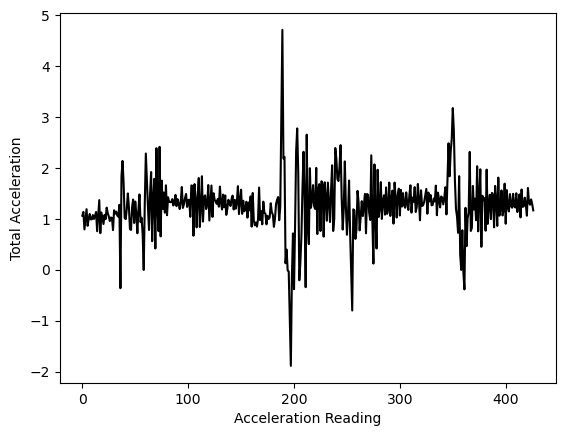

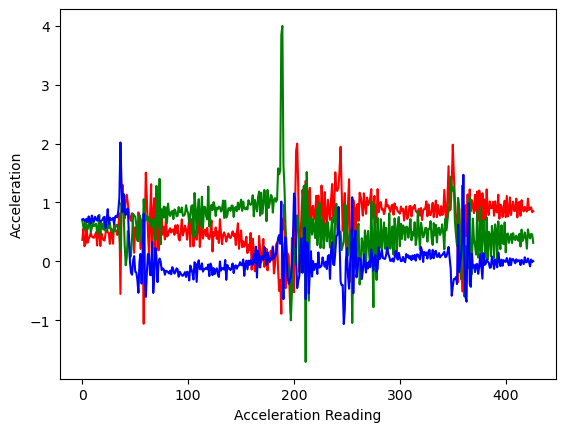

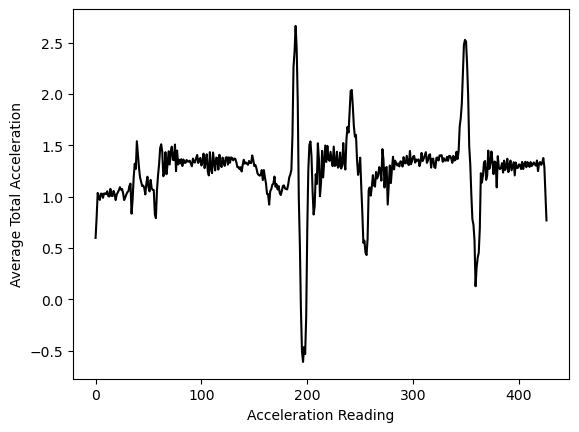

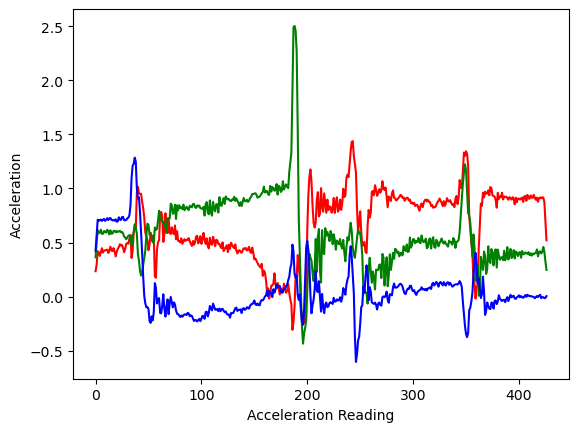

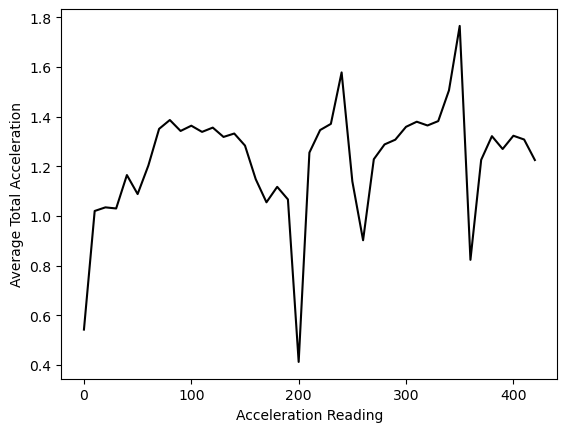

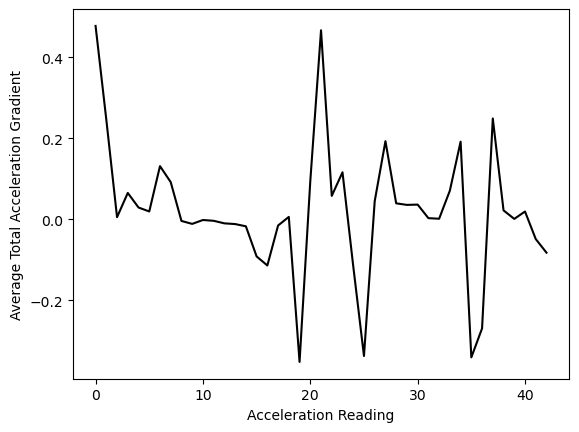

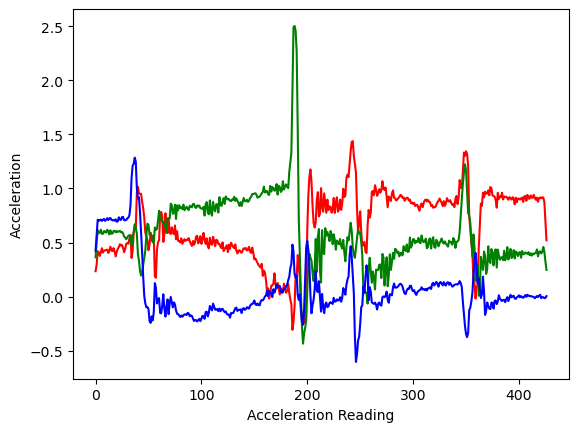

Stationary points found with a thresh hold of 0.200: 7


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def make_plot(df_column, color, xlabel ="", ylabel=""):
    plt.plot(df_column, color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
# Change file name to which climb you would like to plot graphs of

df = pd.read_csv('./Data/Climb_Route2_1.csv', index_col=False) #Read from File

# Change axis names to more representative column names
df = df.set_axis(['x_acc', 'y_acc', 'z_acc', 'x_roll', 'y_yaw', 'z_pitch'], axis=1)

# Calculate the total acceleration of all 3 axis
df['acc_total']= df.iloc[:, 0:2].sum(axis=1)

# Graphs based on the raw climbing data

x_acc = df['x_acc']
y_acc = df['y_acc']
z_acc = df['z_acc']
x_roll = df['x_roll']
y_yaw = df['y_yaw']
z_pitch = df['z_pitch']
acc_total = df['acc_total']

make_plot(acc_total, "black",xlabel="Acceleration Reading", ylabel = "Total Acceleration")
# make_plot(x_acc, "red",xlabel="Acceleration Reading", ylabel = "x Acceleration")
# make_plot(y_acc, "green",xlabel="Acceleration Reading", ylabel = "y Acceleration")
# make_plot(z_acc, "blue",xlabel="Acceleration Reading", ylabel = "z Acceleration")
# make_plot(x_roll, "red",xlabel="Roll Rotation Reading", ylabel = "Roll Rotation")
# make_plot(y_yaw, "green",xlabel="Yaw Rotation Reading", ylabel = "Yaw Rotation")
# make_plot(z_pitch, "blue",xlabel="Pitch Rotation Reading", ylabel = "Pitch Rotation")

plt.plot(x_acc, color='red')
plt.plot(y_acc, color='green')
plt.plot(z_acc, color='blue')
plt.xlabel("Acceleration Reading")
plt.ylabel("Acceleration")
plt.show()

# Create a rolling average dataframe

# Rolling average size, must be an odd number
ROLL_AVERAGE = 5
rolled_df = df.rolling(ROLL_AVERAGE, min_periods=1, center=True).sum()
rolled_df = rolled_df.apply(lambda x: x/ROLL_AVERAGE)

# Create graphs based on the rolling average
x_acc = rolled_df['x_acc']
y_acc = rolled_df['y_acc']
z_acc = rolled_df['z_acc']
x_roll = rolled_df['x_roll']
y_yaw = rolled_df['y_yaw']
z_pitch = rolled_df['z_pitch']
acc_total = rolled_df['acc_total']

make_plot(acc_total, "black",xlabel="Acceleration Reading", ylabel = "Average Total Acceleration")
# make_plot(x_acc, "red",xlabel="Acceleration Reading", ylabel = "Average x Acceleration")
# make_plot(y_acc, "green",xlabel="Acceleration Reading", ylabel = "Average y Acceleration")
# make_plot(z_acc, "blue",xlabel="Acceleration Reading", ylabel = "Average z Acceleration")
# make_plot(x_roll, "red",xlabel="Roll Rotation Reading", ylabel = "Average Roll Rotation")
# make_plot(y_yaw, "green",xlabel="Yaw Rotation Reading", ylabel = "Average Yaw Rotation")
# make_plot(z_pitch, "blue",xlabel="Pitch Rotation Reading", ylabel = "Average Pitch Rotation")

plt.plot(x_acc, color='red')
plt.plot(y_acc, color='green')
plt.plot(z_acc, color='blue')
plt.xlabel("Acceleration Reading")
plt.ylabel("Acceleration")
plt.show()




# Create a rolling average dataframe for stationary point detection

# Rolling average size, must be an odd number
ROLL_AVERAGE_ANALYSIS = 15

# Rolling window is applied 
rolled_df_analysis = df.rolling(ROLL_AVERAGE_ANALYSIS, min_periods=1, center=True).sum()

# Rolling Average is applied 
rolled_df_analysis = rolled_df_analysis.apply(lambda x: x/ROLL_AVERAGE_ANALYSIS)

# Take every n readings
rolled_df_analysis = rolled_df_analysis.iloc[::10, :]

acc_total = rolled_df_analysis['acc_total']
make_plot(acc_total, "black",xlabel="Acceleration Reading", ylabel = "Average Total Acceleration")
make_plot(np.gradient(acc_total), "black",xlabel="Acceleration Reading", ylabel = "Average Total Acceleration Gradient")
plt.plot(x_acc, color='red')
plt.plot(y_acc, color='green')
plt.plot(z_acc, color='blue')
plt.xlabel("Acceleration Reading")
plt.ylabel("Acceleration")
plt.show()

# Arbitarily chosen threshold hyperparameter to find stationary points
THRESHOLD_VALUE = 0.20

def find_stationary_points(datapoints):
    # starts at 1 as the last hold is stopped before additional acceleration
    count = 1
    flag = False
    for data in datapoints:
        if flag and (data < THRESHOLD_VALUE or data > -THRESHOLD_VALUE):
            flag = False
            count += 1
        elif not flag and (data > THRESHOLD_VALUE or data < -THRESHOLD_VALUE):
            flag = True
    return count

print("Stationary points found with a thresh hold of {threshold:.3f}: ".format(threshold = THRESHOLD_VALUE)
      + str(find_stationary_points(np.gradient(acc_total))))